In [1]:
import sys

sys.path.append("c:\\Users\\robin\\Documents\\HyperBrain")
sys.path.append("c:\\Users\\robin\\Documents\\HyperBrain\\source")

In [2]:
from source.datasets.brain_dataset import BrainDataset
import torch
import matplotlib.pyplot as plt

In [3]:
dataset = BrainDataset(
    images_directory="../../data/cyto_downscaled_3344_3904/",
    train=True,
    transformation_threshold=0.3,
    crop_size=640,
    max_translation_shift=50,
    patch_size=16,
    fine_feature_size=160,
    return_crop_coordinates=True,
)

In [4]:
heatmap_crop_1 = torch.zeros(3344, 3904)
heatmap_crop_2 = torch.zeros(3344, 3904)

In [5]:
N = 100
counter = 0
for n in range(N):
    for sample in dataset:
        (
            image_1_crop,
            image_2_crop,
            match_matrix,
            relative_coordinates,
            crop_coordinate_mapping,
            crop_position_image_1,
            crop_position_image_2,
        ) = sample
        crop_position_image_1_x = crop_position_image_1[0]
        crop_position_image_1_y = crop_position_image_1[1]
        crop_position_image_2_x = crop_position_image_2[0]
        crop_position_image_2_y = crop_position_image_2[1]

        heatmap_crop_1[
            crop_position_image_1_y : crop_position_image_1_y + 640,
            crop_position_image_1_x : crop_position_image_1_x + 640,
        ] += 1
        heatmap_crop_2[
            crop_position_image_2_y : crop_position_image_2_y + 640,
            crop_position_image_2_x : crop_position_image_2_x + 640,
        ] += 1
        counter += 1

In [11]:
heatmap_crop_1 /= counter
heatmap_crop_2 /= counter

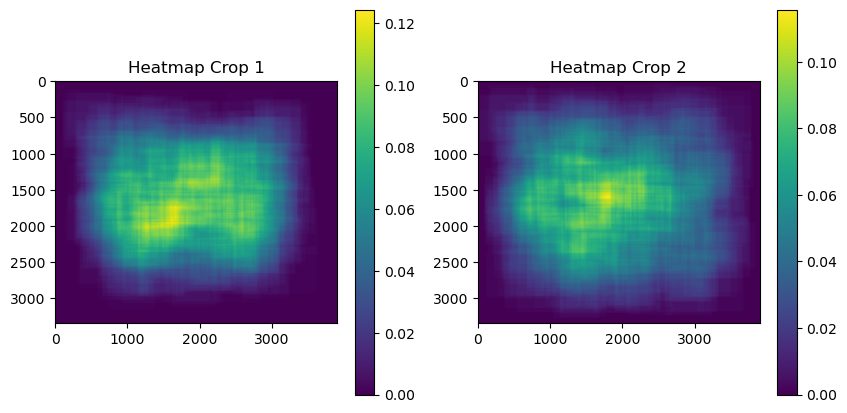

In [12]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

im1 = ax1.imshow(heatmap_crop_1)
ax1.set_title("Heatmap Crop 1")
fig.colorbar(im1, ax=ax1)

im2 = ax2.imshow(heatmap_crop_2)
ax2.set_title("Heatmap Crop 2")
fig.colorbar(im2, ax=ax2)

plt.show()